In [3]:
%%bash
# The notebook is running in anaconda3 environment so we need to set the environment 
# to run dx in the orignal context. We might want to consolidate this into a wrapping script
cat <<EOF > ./dx
#!/bin/bash
export PATH=/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/snap/bin
export PYTHONPATH="/usr/share/dnanexus/lib/python2.7/site-packages:/usr/share/dnanexus/lib/python2.7/site-packages:/usr/share/dnanexus/lib/python2.7/site-packages:/usr/share/dnanexus/lib/python2.7/site-packages:"
source $HOME/environment
source ~/.dnanexus_config/unsetenv
/usr/bin/dx select SVAI_Hackathon
/usr/bin/dx \$@
EOF
chmod u+x ./dx

In [4]:
# !./dx download -f gene_expression_aggregated/FPKM.tsv
!./dx download -f Clemson_TCGA_GEM/KIRP_filtered_by_gene_and_tumor.tsv

Selected project SVAI_Hackathon



In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
%matplotlib inline

## Load expression data

In [8]:
# df=pd.read_csv("KIRP_filtered_by_gene_and_tumor.tsv", sep="\t")
rnaseq_file = os.path.join('KIRP_filtered_by_gene_and_tumor.tsv')
df = pd.read_table(rnaseq_file, index_col=0)
print(df.shape)
df.head(2)

(6907, 321)


,KIRP.85b1ee20-f35b-4d08-8072-f722edad2eef.FPKM.txt,KIRP.cfd06ff6-87b9-4ad3-8ebf-3bb6299449a5.FPKM.txt,KIRP.d3542f90-6a65-40e4-9f2c-6ae5df3adc8d.FPKM.txt,KIRP.9e2a71b9-8f43-4fef-8fa6-ef4113521903.FPKM.txt,KIRP.239933ad-ca2c-4853-91bd-7525ffe88150.FPKM.txt,KIRP.91bad16d-bded-491a-95b4-f21ff7242a0e.FPKM.txt,KIRP.31c45ffe-dfa0-4905-9d75-e1e22b7a6e69.FPKM.txt,KIRP.18ea0e96-a76f-42ae-a340-019b24823d26.FPKM.txt,KIRP.992df1bb-d4c6-4bb2-82c0-f93af6f212d2.FPKM.txt,KIRP.a5e07df6-2166-422f-b852-dc5da2e3a876.FPKM.txt,...,KIRP.c898f9c0-3f1f-4c10-bca4-fa3d1b856029.FPKM.txt,KIRP.318310b3-2436-4533-b738-00477eafad0a.FPKM.txt,KIRP.0d2efe0a-c0a9-4a75-bf04-b5dbf497b561.FPKM.txt,KIRP.e9cf91c3-db89-4855-9d40-d66f9fb49225.FPKM.txt,KIRP.dc63da49-8faf-4912-aa74-f37154384746.FPKM.txt,KIRP.149735c0-c26e-4983-8053-1582c706f9ed.FPKM.txt,KIRP.6e4ad047-a669-440f-b45f-2fef73171994.FPKM.txt,KIRP.0e0185c3-6751-4ec9-9730-b3da33b71d00.FPKM.txt,KIRP.1af1aa3f-8f7c-4b29-bf14-5427d5a87c0a.FPKM.txt,KIRP.c4b33860-c481-47cd-a6e2-9f587c007389.FPKM.txt
ENSGRowID,,,,,,,,,,,,,,,,,,,,,
KIRPENSG00000000003.13,10.538783,15.104130,18.075662,14.381218,16.922547,12.760326,11.224059,17.951519,14.108208,9.359257,...,14.488163,10.587495,25.955510,23.009394,13.996247,18.590764,11.756337,14.185758,8.481718,12.955887
KIRPENSG00000000457.12,1.669259,1.596968,1.854192,1.313608,1.996512,1.615552,1.898646,1.272366,1.028086,1.110629,...,1.889638,1.485031,3.554479,1.485065,1.443945,1.773033,1.844888,0.755278,0.517793,2.189295


In [60]:
headerlist=list(df.columns.values)
headerfile=open('header.txt','w')
headerfile.writelines('\t'.headerlist)

AttributeError: 'str' object has no attribute 'headerlist'

In [9]:
m=np.log2(np.array(df.values[1:,1:], dtype=float)+1)

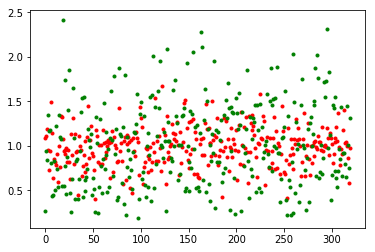

In [10]:
plt.plot(m[14,:]/np.median(m[14,:]), '.r')
plt.plot(m[21,:]/np.median(m[21,:]), '.g')

Text(0,0.5,'median of log2(FPKM-UQ)')

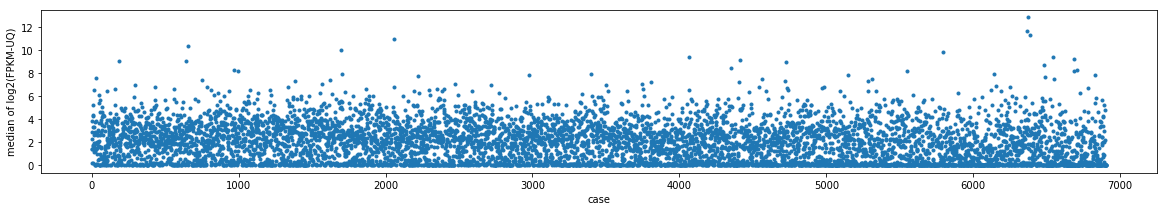

In [11]:
plt.figure(figsize=(20,3))
plt.plot(np.median(m[:,:], axis=1), '.')
plt.xlabel("case")
plt.ylabel("median of log2(FPKM-UQ)")

In [12]:
mm = np.median(m[:,:], axis=1)

In [13]:
m2 = abs(m.transpose() - mm)
print(m2.shape)

(320, 6906)


ValueError: too many values to unpack (expected 2)

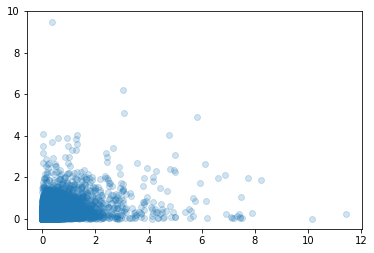

In [14]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X=m2.T # X=m2
pca.fit(X)
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

(0, 1)

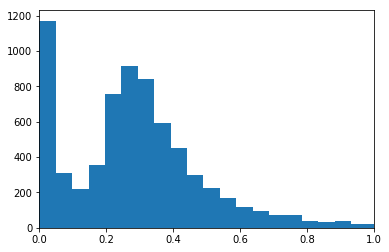

In [16]:
plt.hist(np.median(m2, axis=0), bins=50);
plt.xlim(0,1)

In [17]:
m3=m[np.median(m2, axis=0)>0.4,:]
print(m3.shape)

(1663, 320)


In [18]:
m3=m.T
m3.shape

(320, 6906)

In [19]:
n_case = len(m3[0,:])
n_gene = len(m3[:,0])
print(n_case)
print(n_gene)

6906
320


The VAE code is adapted from https://jmetzen.github.io/2015-11-27/vae.html

In [20]:
def xavier_init(fan_in, fan_out, constant=1): 
    """ Xavier initialization of network weights"""
    # https://stackoverflow.com/questions/33640581/how-to-do-xavier-initialization-on-tensorflow
    low = -constant*np.sqrt(6.0/(fan_in + fan_out)) 
    high = constant*np.sqrt(6.0/(fan_in + fan_out))
    return tf.random_uniform((fan_in, fan_out), 
                             minval=low, maxval=high, 
                             dtype=tf.float32)

In [21]:
class VariationalAutoencoder(object):
    """ Variation Autoencoder (VAE) with an sklearn-like interface implemented using TensorFlow.
    
    This implementation uses probabilistic encoders and decoders using Gaussian 
    distributions and  realized by multi-layer perceptrons. The VAE can be learned
    end-to-end.
    
    See "Auto-Encoding Variational Bayes" by Kingma and Welling for more details.
    """
    def __init__(self, network_architecture, transfer_fct=tf.nn.relu, 
                 learning_rate=0.001, batch_size=100):
        self.network_architecture = network_architecture
        self.transfer_fct = transfer_fct
        self.learning_rate = learning_rate
        self.batch_size = batch_size
        
        # tf Graph input
        self.x = tf.placeholder(tf.float32, [None, network_architecture["n_input"]])
        
        # Create autoencoder network
        self._create_network()
        # Define loss function based variational upper-bound and 
        # corresponding optimizer
        self._create_loss_optimizer()
        
        # Initializing the tensor flow variables
        init = tf.global_variables_initializer()

        # Launch the session
        self.sess = tf.InteractiveSession()
        self.sess.run(init)
    
    def _create_network(self):
        # Initialize autoencode network weights and biases
        network_weights = self._initialize_weights(**self.network_architecture)

        # Use recognition network to determine mean and 
        # (log) variance of Gaussian distribution in latent
        # space
        self.z_mean, self.z_log_sigma_sq = \
            self._recognition_network(network_weights["weights_recog"], 
                                      network_weights["biases_recog"])

        # Draw one sample z from Gaussian distribution
        n_z = self.network_architecture["n_z"]
        eps = tf.random_normal((self.batch_size, n_z), 0, 1, 
                               dtype=tf.float32)
        # z = mu + sigma*epsilon
        self.z = tf.add(self.z_mean, 
                        tf.multiply(tf.sqrt(tf.exp(self.z_log_sigma_sq)), eps))

        # Use generator to determine mean of
        # Bernoulli distribution of reconstructed input
        self.x_reconstr_mean = \
            self._generator_network(network_weights["weights_gener"],
                                    network_weights["biases_gener"])
            
    def _initialize_weights(self, n_hidden_recog_1, n_hidden_recog_2, 
                            n_hidden_gener_1,  n_hidden_gener_2, 
                            n_input, n_z):
        all_weights = dict()
        all_weights['weights_recog'] = {
            'h1': tf.Variable(xavier_init(n_input, n_hidden_recog_1)),
            'h2': tf.Variable(xavier_init(n_hidden_recog_1, n_hidden_recog_2)),
            'out_mean': tf.Variable(xavier_init(n_hidden_recog_2, n_z)),
            'out_log_sigma': tf.Variable(xavier_init(n_hidden_recog_2, n_z))}
        all_weights['biases_recog'] = {
            'b1': tf.Variable(tf.zeros([n_hidden_recog_1], dtype=tf.float32)),
            'b2': tf.Variable(tf.zeros([n_hidden_recog_2], dtype=tf.float32)),
            'out_mean': tf.Variable(tf.zeros([n_z], dtype=tf.float32)),
            'out_log_sigma': tf.Variable(tf.zeros([n_z], dtype=tf.float32))}
        all_weights['weights_gener'] = {
            'h1': tf.Variable(xavier_init(n_z, n_hidden_gener_1)),
            'h2': tf.Variable(xavier_init(n_hidden_gener_1, n_hidden_gener_2)),
            'out_mean': tf.Variable(xavier_init(n_hidden_gener_2, n_input)),
            'out_log_sigma': tf.Variable(xavier_init(n_hidden_gener_2, n_input))}
        all_weights['biases_gener'] = {
            'b1': tf.Variable(tf.zeros([n_hidden_gener_1], dtype=tf.float32)),
            'b2': tf.Variable(tf.zeros([n_hidden_gener_2], dtype=tf.float32)),
            'out_mean': tf.Variable(tf.zeros([n_input], dtype=tf.float32)),
            'out_log_sigma': tf.Variable(tf.zeros([n_input], dtype=tf.float32))}
        return all_weights
            
    def _recognition_network(self, weights, biases):
        # Generate probabilistic encoder (recognition network), which
        # maps inputs onto a normal distribution in latent space.
        # The transformation is parametrized and can be learned.
        layer_1 = self.transfer_fct(tf.add(tf.matmul(self.x, weights['h1']), 
                                           biases['b1'])) 
        layer_2 = self.transfer_fct(tf.add(tf.matmul(layer_1, weights['h2']), 
                                           biases['b2'])) 
        z_mean = tf.add(tf.matmul(layer_2, weights['out_mean']),
                        biases['out_mean'])
        z_log_sigma_sq = \
            tf.add(tf.matmul(layer_2, weights['out_log_sigma']), 
                   biases['out_log_sigma'])
        return (z_mean, z_log_sigma_sq)

    def _generator_network(self, weights, biases):
        # Generate probabilistic decoder (decoder network), which
        # maps points in latent space onto a Bernoulli distribution in data space.
        # The transformation is parametrized and can be learned.
        layer_1 = self.transfer_fct(tf.add(tf.matmul(self.z, weights['h1']), 
                                           biases['b1'])) 
        layer_2 = self.transfer_fct(tf.add(tf.matmul(layer_1, weights['h2']), 
                                           biases['b2'])) 
        x_reconstr_mean = \
            tf.nn.relu(tf.add(tf.matmul(layer_2, weights['out_mean']), 
                                 biases['out_mean']))
        return x_reconstr_mean
            
    def _create_loss_optimizer(self):
        # The loss is composed of two terms:
        # 1.) The reconstruction loss (the negative log probability
        #     of the input under the reconstructed Bernoulli distribution 
        #     induced by the decoder in the data space).
        #     This can be interpreted as the number of "nats" required
        #     for reconstructing the input when the activation in latent
        #     is given.
        # Adding 1e-10 to avoid evaluation of log(0.0)
        reconstr_loss = \
            tf.nn.l2_loss(self.x - self.x_reconstr_mean)

        # 2.) The latent loss, which is defined as the Kullback Leibler divergence 
        ##    between the distribution in latent space induced by the encoder on 
        #     the data and some prior. This acts as a kind of regularizer.
        #     This can be interpreted as the number of "nats" required
        #     for transmitting the the latent space distribution given
        #     the prior.
        latent_loss = -0.5 * tf.reduce_sum(1 + self.z_log_sigma_sq 
                                           - tf.square(self.z_mean) 
                                           - tf.exp(self.z_log_sigma_sq), 1)
        self.cost = tf.reduce_mean(reconstr_loss + latent_loss)   # average over batch
        # Use ADAM optimizer
        self.optimizer = \
            tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(self.cost)
        
    def partial_fit(self, X):
        """Train model based on mini-batch of input data.
        
        Return cost of mini-batch.
        """
        opt, cost = self.sess.run((self.optimizer, self.cost), 
                                  feed_dict={self.x: X})
        return cost
    
    def transform(self, X):
        """Transform data by mapping it into the latent space."""
        # Note: This maps to mean of distribution, we could alternatively
        # sample from Gaussian distribution
        return self.sess.run(self.z_mean, feed_dict={self.x: X})
    
    def generate(self, z_mu=None):
        """ Generate data by sampling from latent space.
        
        If z_mu is not None, data for this point in latent space is
        generated. Otherwise, z_mu is drawn from prior in latent 
        space.        
        """
        if z_mu is None:
            z_mu = np.random.normal(size=self.network_architecture["n_z"])
        # Note: This maps to mean of distribution, we could alternatively
        # sample from Gaussian distribution
        return self.sess.run(self.x_reconstr_mean, 
                             feed_dict={self.z: z_mu})
    
    def reconstruct(self, X):
        """ Use VAE to reconstruct given data. """
        return self.sess.run(self.x_reconstr_mean, 
                             feed_dict={self.x: X})

In [22]:
def train(network_architecture, learning_rate=0.001,
          batch_size=100, training_epochs=10, display_step=5):
    vae = VariationalAutoencoder(network_architecture, 
                                 learning_rate=learning_rate, 
                                 batch_size=batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(n_samples / batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, _ = mnist.train.next_batch(batch_size)

            # Fit training using batch data
            cost = vae.partial_fit(batch_xs)
            # Compute average loss
            avg_cost += cost / n_samples * batch_size

        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), 
                  "cost=", "{:.9f}".format(avg_cost))
    return vae

In [23]:
mt = m.transpose()
print( m[(1,3,4),:].shape )
c = range(m.shape[0])
import random
ridx = random.sample(c, 5)
print( m[ridx,:].shape )

(3, 320)
(5, 320)


In [24]:
print(n_case)

6906


In [25]:
network_architecture = \
    dict(n_hidden_recog_1=120, # 1st layer encoder neurons
         n_hidden_recog_2=60, # 2nd layer encoder neurons
         n_hidden_gener_1=60, # 1st layer decoder neurons
         n_hidden_gener_2=120, # 2nd layer decoder neurons
         n_input=n_case, 
         n_z=16)  # dimensionality of latent space
learning_rate = 0.00001
batch_size = 100
vae = VariationalAutoencoder(network_architecture, 
                             learning_rate=learning_rate, 
                             batch_size=batch_size)
#cost = vae.partial_fit(m[19:24,:])
#print(cost)

In [26]:
cost = vae.partial_fit(m[19:19+batch_size,:])
print(cost)

ValueError: Cannot feed value of shape (100, 320) for Tensor 'Placeholder:0', which has shape '(?, 6906)'

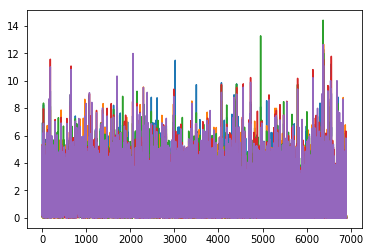

In [27]:
plt.plot(m3[19:24,:].transpose())

In [28]:
gene_idx = range(m3.shape[0])
n_case = m3.shape[1]
training_epochs = 2000

display_step = 100
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(n_gene / batch_size)
    # Loop over all batches
    for i in range(total_batch):
        ridx = random.sample(gene_idx, batch_size)
        batch_xs = m3[ridx,:]

        # Fit training using batch data
        cost = vae.partial_fit(batch_xs)
        #print("cost:", cost)
        # Compute average loss
        avg_cost += cost / n_gene * batch_size

    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), 
              "cost=", "{:.9f}".format(avg_cost))

Epoch: 0001 cost= 2106139.218750000
Epoch: 0101 cost= 1008571.953125000
Epoch: 0201 cost= 553541.191406250
Epoch: 0301 cost= 363923.457031250
Epoch: 0401 cost= 165471.557617188
Epoch: 0501 cost= 154870.214843750
Epoch: 0601 cost= 146654.648437500
Epoch: 0701 cost= 148496.538085938
Epoch: 0801 cost= 140249.448242188
Epoch: 0901 cost= 150721.323242188
Epoch: 1001 cost= 144235.170898438
Epoch: 1101 cost= 143897.436523438
Epoch: 1201 cost= 145804.301757812
Epoch: 1301 cost= 146197.509765625
Epoch: 1401 cost= 143486.284179688
Epoch: 1501 cost= 135005.595703125
Epoch: 1601 cost= 131666.684570312
Epoch: 1701 cost= 126701.252441406
Epoch: 1801 cost= 126475.576171875
Epoch: 1901 cost= 121132.651367188


In [29]:
ridx = random.sample(gene_idx, batch_size)
batch_xs = m3[ridx,:]

x_reconstr_mean, = vae.sess.run((vae.x_reconstr_mean,), 
                          feed_dict={vae.x: batch_xs })

(0, 15)

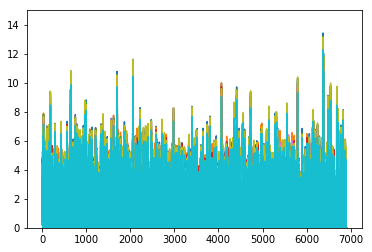

In [31]:
plt.plot(x_reconstr_mean[0:10,:].transpose());
plt.ylim(0,15)

(0, 15)

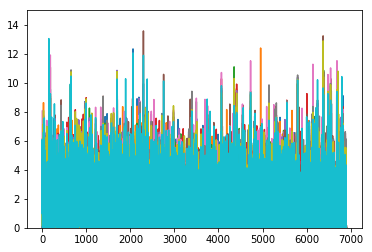

In [32]:
plt.plot(batch_xs[0:10,:].transpose());
plt.ylim(0,15)

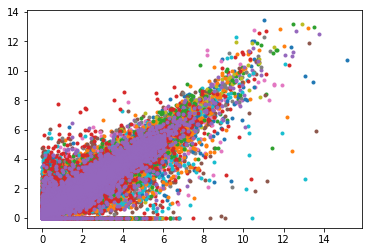

In [33]:
for i in range(15):
    plt.plot(batch_xs[i,:],x_reconstr_mean[i,:], '.');

In [34]:
print(len(gene_idx))
ridx = random.sample(gene_idx, batch_size)
batch_xs = m3[ridx,:]


z_mean, = vae.sess.run((vae.z_mean,), 
                          feed_dict={vae.x: m3})

320


In [35]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [36]:
df2 = pd.DataFrame(z_mean[:,:16])

In [37]:
z_mean[:,:15].shape

(320, 15)

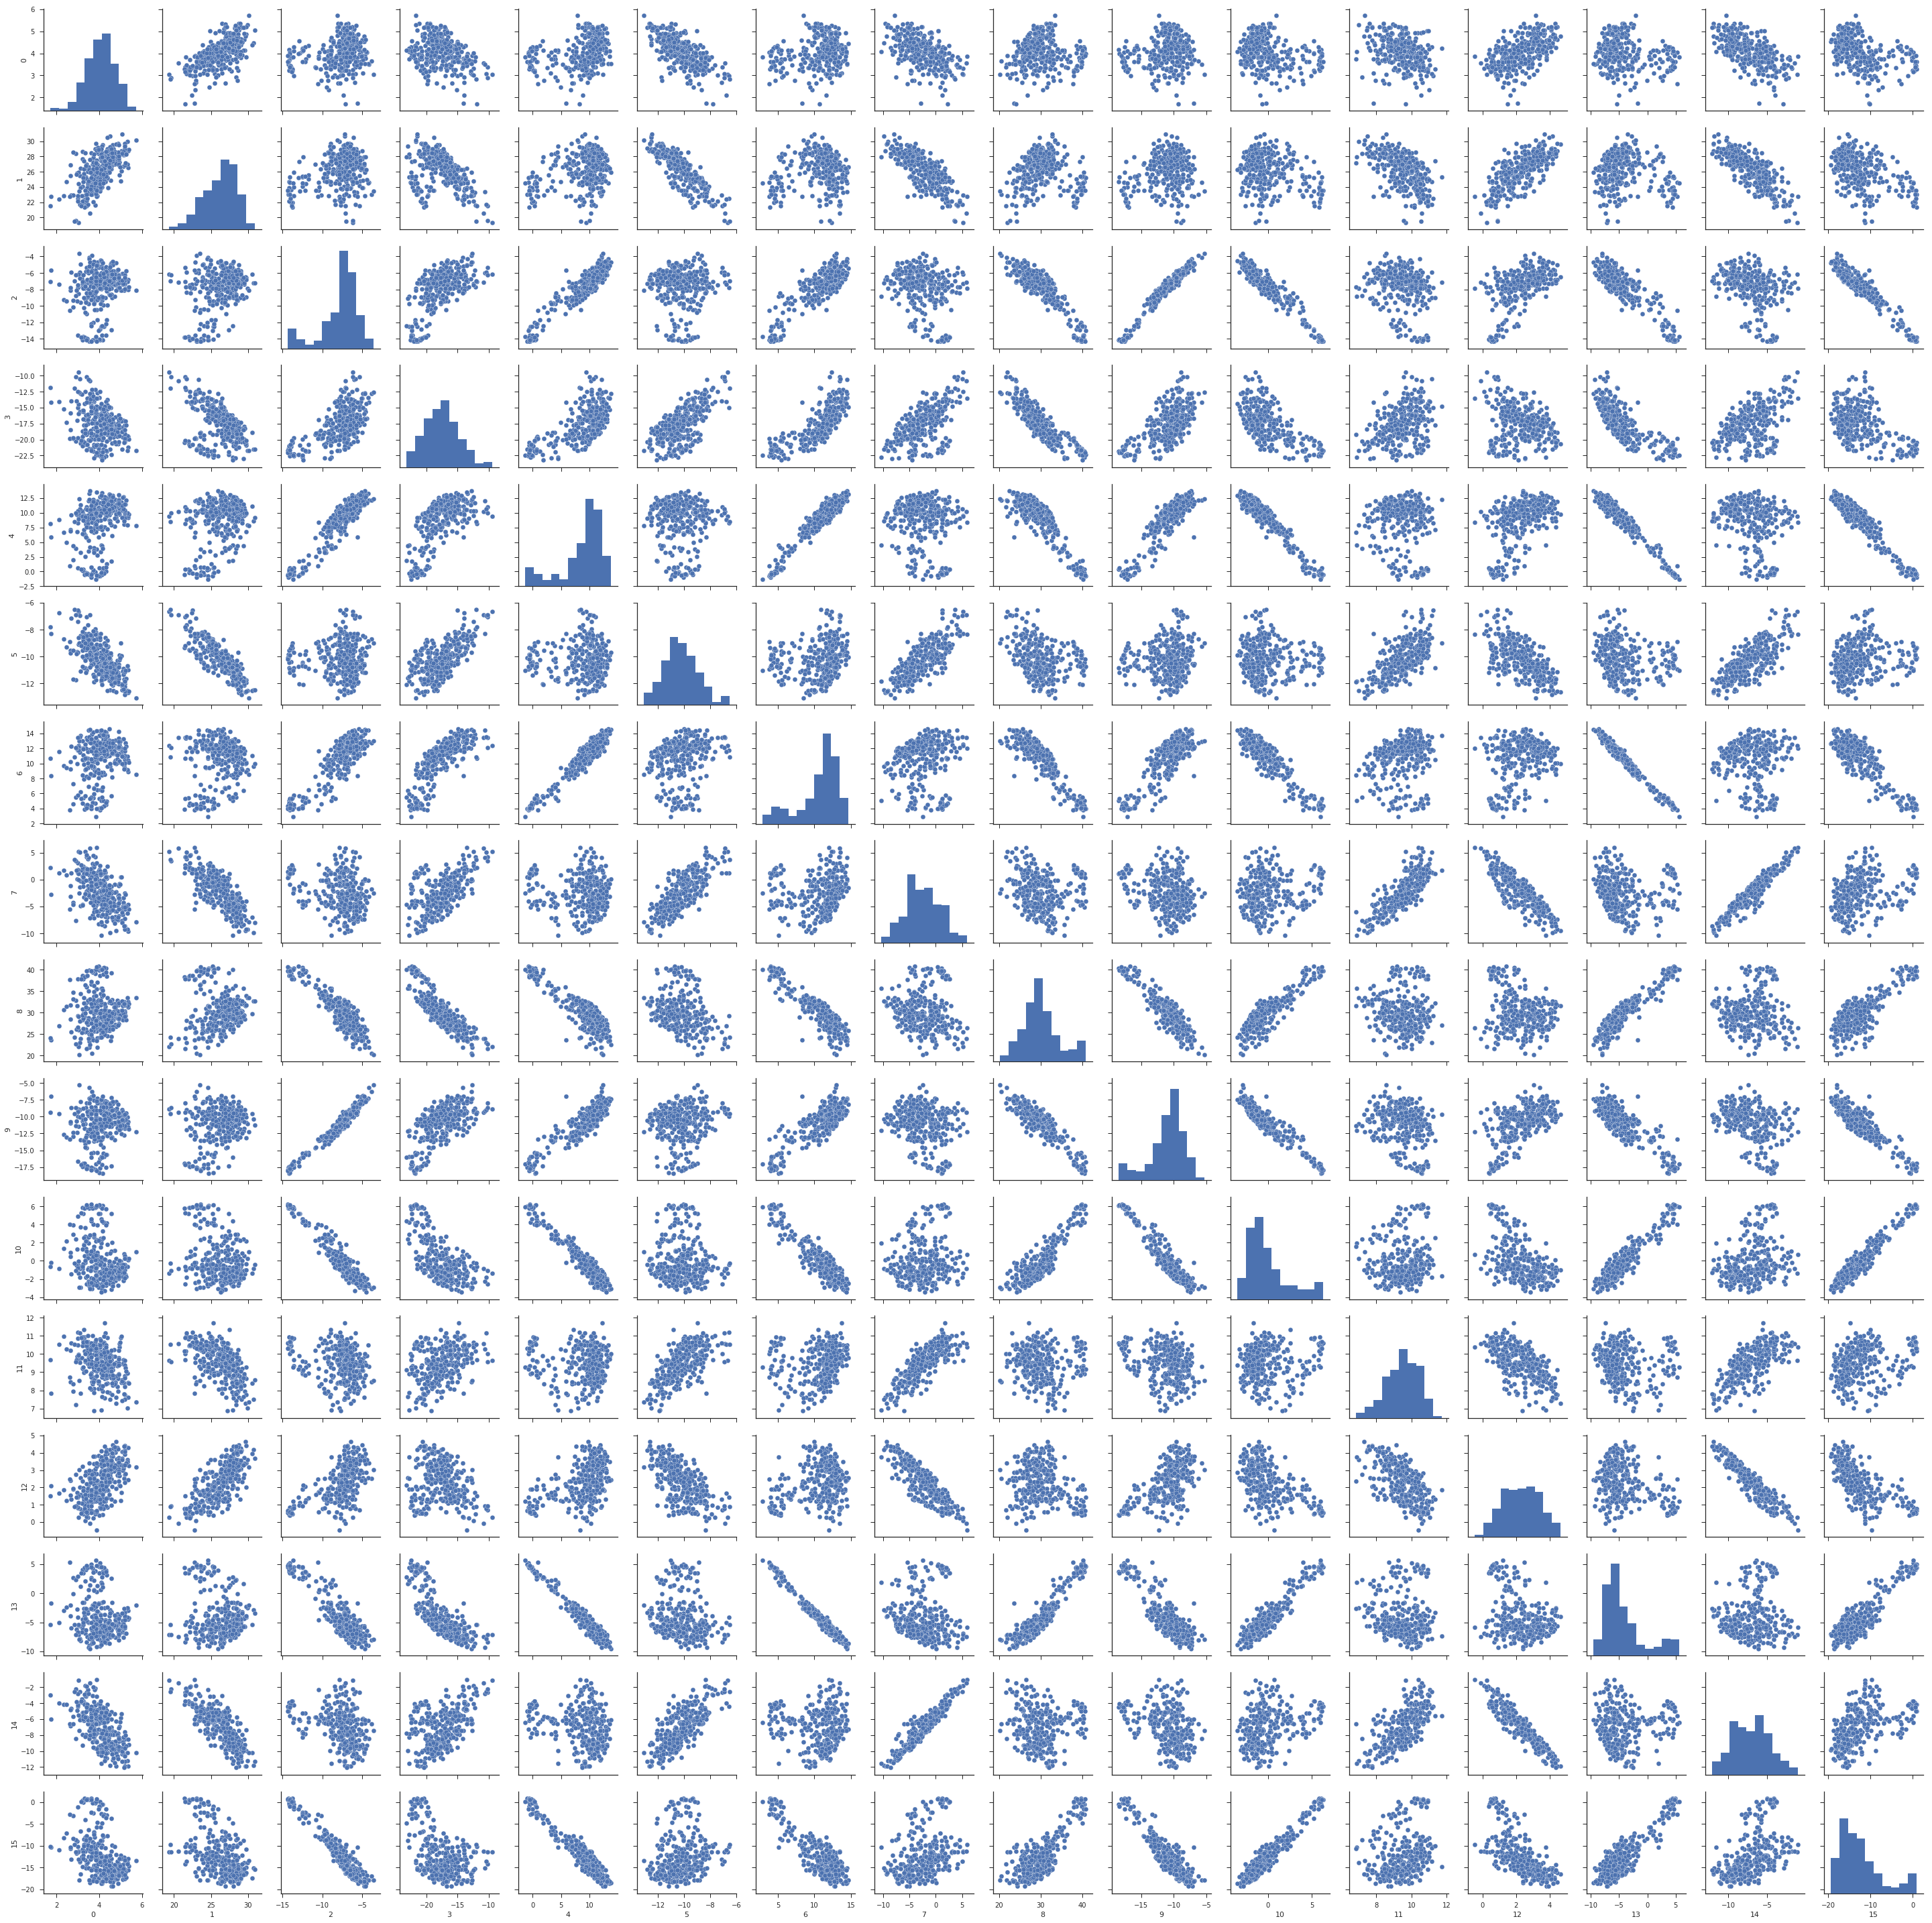

In [38]:
sns.pairplot(df2)

In [39]:
from sklearn.manifold import TSNE
z_mean, = vae.sess.run((vae.z_mean,), 
                          feed_dict={vae.x: m3 })

In [40]:
X_embedded = TSNE(n_components=2, perplexity=20,n_iter=5000).fit_transform(z_mean)

In [41]:
X_embedded.shape

(320, 2)

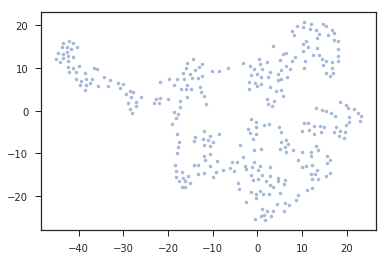

In [42]:
plt.plot(X_embedded[:,0], X_embedded[:,1],'.', alpha=0.5)

In [58]:
X_embedded.shape
np.savetxt('coordinate.tsv', X_embedded, delimiter='\t') 


In [49]:
len(X_embedded)


320

In [ ]:
!./dx upload 16panel.ipynb